# Project Work
This project is composed from two dataset:
- Lipidoma
- Metaboloma

The aim of this project is identify bio-markers that allow to distinguish the evolution of pathology (HCV). We have 3 several class of patient:
- LC: Hepatocellular carcinoma
- HC: Hepatitis C virus
- MC: Mixed Cryoglobulinemia disease

## Lipidoma

### Read data set 
On the raw we have the features, while on the column we have the samples.

However, I set the features on the column and the samples on the raw.

In [99]:
import pandas as pd
import numpy as np

data_lipidoma_transpose = pd.read_excel("DataSet PAscale/Lipidoma.xlsx")

data_lipidoma = data_lipidoma_transpose.T

data_lipidoma.columns = data_lipidoma_transpose["Name"]

data_lipidoma = data_lipidoma.iloc[1:]

data_lipidoma.columns = ["Label"] + list(data_lipidoma.columns[1:])

df_y_lipidoma = data_lipidoma["Label"].iloc[8:]

df_y_qc_lipidoma = data_lipidoma["Label"].iloc[1:8]

mz_lipidoma = data_lipidoma.iloc[0:1,1:]

df_x_lipidoma = pd.concat([mz_lipidoma,data_lipidoma.iloc[8:,1:]])

df_qc_lipidoma = data_lipidoma.iloc[1:8]

name_samples_lipidoma = df_x_lipidoma.transpose().columns[1:]

df_x_lipidoma

,CE 16:0,CE 16:1,CE 18:1,CE 18:2,CE 20:3,CE 20:4,CE 20:5,Cer 16:1;2O/22:0,Cer 18:1;2O/22:0,Cer 18:1;2O/23:0,...,TG 18:1_18:1_20:1,TG 18:1_18:1_20:4,TG 18:1_18:2_18:2,TG 18:1_18:2_20:4,TG 18:1_18:2_22:0,TG 18:1_18:2_24:0,TG 18:2_18:2_18:2,TG 18:2_18:2_20:0,TG 18:2_18:2_22:0,TG O-18:1_16:0_18:1
m/z meas.,642.6174,640.60243,668.63442,666.61862,692.63127,690.61797,688.60212,594.58198,622.61327,636.62848,...,930.84521,924.79945,898.7841,922.78493,958.87774,986.90901,896.7692,928.82878,956.86203,862.82002
LC 203_M,0.259729,0.454105,2.683583,9.261392,0.507936,1.588821,0.207073,0.005097,0.035252,0.029192,...,0.052775,0.166436,0.294573,0.122915,0.005585,0.001793,0.139859,0.071317,0.008301,0.003898
LC 235a_M,0.429931,0.348709,4.32928,17.570488,0.628331,2.977383,0.578514,0.020665,0.065406,0.06661,...,0.07022,0.288299,0.432012,0.318041,0.009487,0.002004,0.149326,0.097133,0.005557,0.012164
LC 235b_M,0.288139,0.323409,3.218284,11.974105,0.360963,1.413059,0.358056,0.012361,0.041918,0.040514,...,0.064644,0.184927,0.288274,0.237781,0.008383,0.0022,0.061738,0.077466,0.006808,0.011423
LC 237_M,0.234688,0.300944,2.526213,7.820927,0.348464,1.214308,0.120798,0.011459,0.049187,0.046511,...,0.123744,0.372475,1.467166,0.297846,0.015404,0.003885,0.641724,0.129745,0.018932,0.004958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC 19_M,0.321473,0.369594,2.94805,24.193067,0.864314,5.183349,0.565892,0.023624,0.112769,0.097707,...,0.030067,0.232738,0.719923,0.154853,0.005753,0.00163,0.175301,0.055449,0.006507,0.007088
HC 21_M,0.261614,0.480679,2.599515,10.807497,0.660797,1.732404,0.084998,0.012143,0.041101,0.036411,...,0.050221,0.155939,0.292474,0.079288,0.007948,0.001621,0.080277,0.083346,0.004616,0.007494
HC 22_M,0.312295,0.505954,4.053028,17.093651,0.837622,3.822791,0.515278,0.013383,0.064994,0.068863,...,0.03194,0.171667,0.266106,0.175584,0.003274,0.001061,0.042257,0.049565,0.00582,0.003099
HC 20_M,0.317264,0.396458,2.96421,11.487462,0.614516,2.62753,0.117277,0.009959,0.057988,0.054172,...,0.036462,0.269189,0.609648,0.154819,0.00536,0.00192,0.17339,0.09585,0.004326,0.002696


In [100]:
# color mapping to use in plot
color_mapping = {
    'LC': 'red',
    'MC': 'green',
    'HC' : 'orange'
}

colors = [color_mapping[label] for label in df_y_lipidoma]

#### View the data
I made a scatter plot with M/Z on the x-axis and intensity on y-axis.

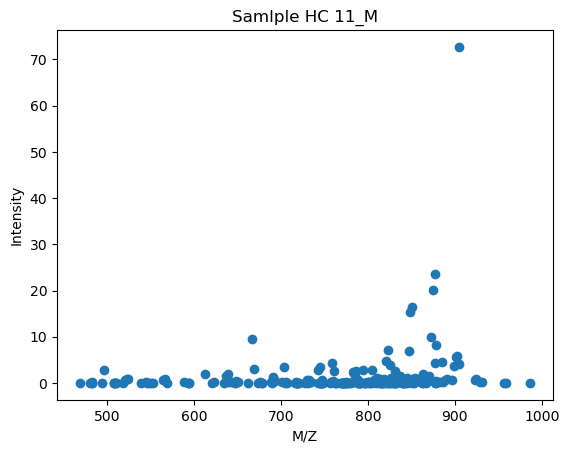

HC 11_M    72.712318
dtype: object


In [101]:
import matplotlib.pyplot as plt

plt.scatter(df_x_lipidoma.iloc[0:1], df_x_lipidoma.iloc[90:91])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
print(df_x_lipidoma[90:91].max(axis=1))


### Fill the gap

In [102]:
print(df_x_lipidoma.isna().sum().sort_values(ascending=False))

LPC 20:0           15
LPC 19:0           15
LPC O-18:1_B       14
SM 14:0;2O/16:1    14
PC 19:0_18:2       13
                   ..
PC 18:1_18:1        0
PC 18:1_22:6        0
PC 18:2_18:2_A      0
PC 18:2_18:2_B      0
PC O-16:1_18:1      0
Length: 226, dtype: int64


In [103]:
df_x_lipidoma_original = df_x_lipidoma.copy()
for column in df_x_lipidoma.columns:
    df_x_lipidoma.loc[:,column] = df_x_lipidoma[column].fillna((np.nanmin(df_x_lipidoma[column]))/5)
print(df_x_lipidoma.isna().sum().sort_values(ascending=False))

CE 16:0                0
SM 18:2;2O/16:0        0
PE 18:0_18:1           0
PE 18:0_18:2           0
PE 18:2_18:0           0
                      ..
PC 16:1_18:2_B         0
PC 17:0_16:2           0
PC 17:0_17:0           0
PC 17:0_18:1           0
TG O-18:1_16:0_18:1    0
Length: 226, dtype: int64


### TIC Normalization with Sum

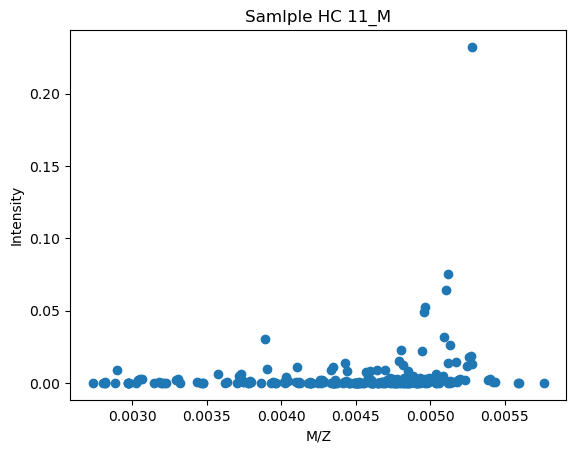

HC 11_M    0.232277
dtype: object

In [104]:
tic = df_x_lipidoma.sum(axis=1)
df_x_lipidoma_tic = df_x_lipidoma.div(tic,axis=0)

plt.scatter(df_x_lipidoma_tic.iloc[0:1], df_x_lipidoma_tic.iloc[90:91])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_lipidoma_tic[90:91].max(axis=1)

#### Scaled Data

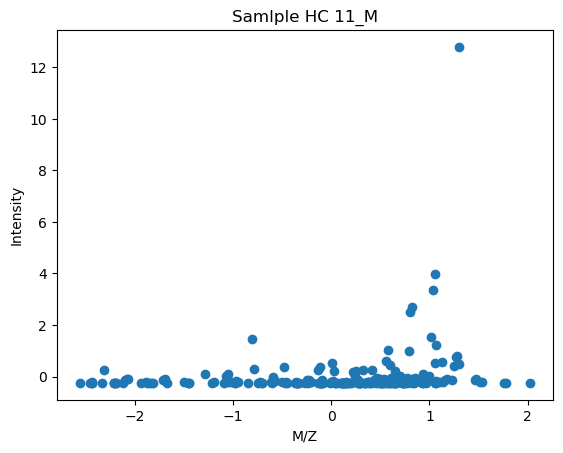

HC 18_M    13.073234
dtype: object

In [105]:
mean_x_tic_sum = df_x_lipidoma_tic.mean(axis=1)
std_x_tic_sum = df_x_lipidoma_tic.std(axis=1)
df_x_lipidoma_tic_scaled = (df_x_lipidoma_tic.sub(mean_x_tic_sum,axis=0)).div(std_x_tic_sum,axis=0)

plt.scatter(df_x_lipidoma_tic_scaled.iloc[0:1], df_x_lipidoma_tic_scaled.iloc[90:91])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()

df_x_lipidoma_tic_scaled[97:98].max(axis=1)

#### Elbow Graph

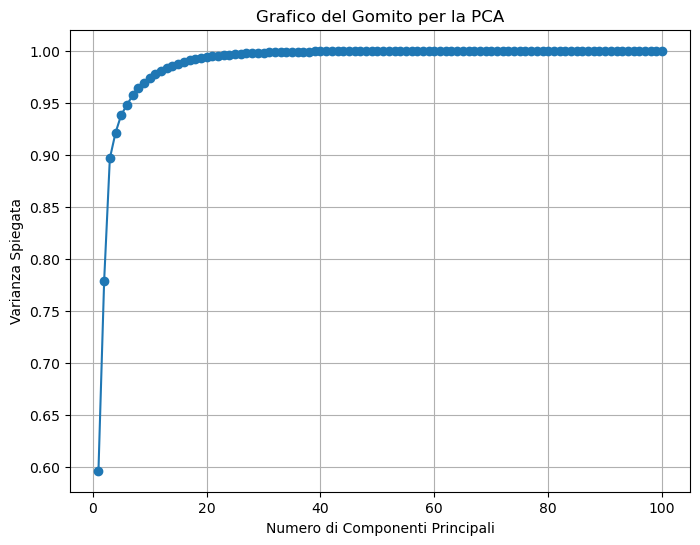

In [106]:
from sklearn.decomposition import PCA

varianza_spiegata_tic_lipodoma = []
n_componenti_tic_lipodoma = np.arange(1, 101)

for n in n_componenti_tic_lipodoma:
    pca = PCA(n_components=n)
    pca.fit(df_x_lipidoma_tic_scaled.iloc[1:])
    varianza_spiegata_tic_lipodoma.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.plot(n_componenti_tic_lipodoma, varianza_spiegata_tic_lipodoma, marker='o')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Spiegata')
plt.title('Grafico del Gomito per la PCA')
plt.grid(True)
plt.show()

#### PCA

In [107]:
pca_tic = PCA(n_components=25)
df_x_lipidoma_tic_scaled_pca = pca_tic.fit(df_x_lipidoma_tic_scaled.iloc[1:]).transform(df_x_lipidoma_tic_scaled.iloc[1:])

##### Print most important features by loadings

In [108]:
loadings_tic = pca_tic.components_

important_features_tic = [i for i, loading in enumerate(loadings_tic[0]) if abs(loading) > 0.22]

print(df_x_lipidoma_tic_scaled.columns[important_features_tic])

Index(['CE 18:2', 'LPC 16:0', 'PI 38:4', 'TG 16:0_18:1_18:1'], dtype='object')


#### LDA

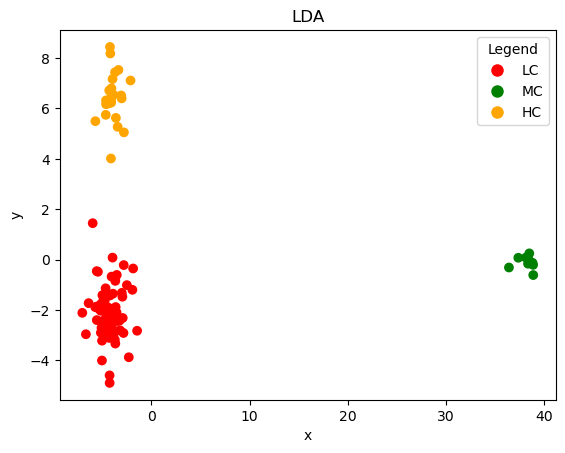

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_tic = LDA(n_components=2)
df_x_lipidoma_tic_scaled_lda = lda_tic.fit(df_x_lipidoma_tic_scaled.iloc[1:],df_y_lipidoma).transform(df_x_lipidoma_tic_scaled.iloc[1:])

plt.scatter(df_x_lipidoma_tic_scaled_lda[:, 0], df_x_lipidoma_tic_scaled_lda[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10)
], title='Legend')
plt.title('LDA')
plt.show()

#### Prova Modello

In [110]:
x = pd.DataFrame(df_x_lipidoma_tic_scaled_pca)
y = df_y_lipidoma

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
x.columns = [f'PC{i+1}' for i in range(x.shape[1])]
x = x.transpose()
x.columns = name_samples_lipidoma
x = x.transpose()
x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
LC 203_M,1.239121,0.265109,-0.564661,-0.434592,-0.412372,0.285176,0.039548,-0.248323,-0.275027,-0.019536,...,-0.073855,-0.159377,0.051591,-0.155540,-0.055974,-0.126108,-0.157906,-0.089247,-0.091035,0.064546
LC 235a_M,-0.880876,0.842435,0.156555,-0.241198,-0.531947,-0.174055,0.102231,0.216915,-0.154166,-0.023853,...,0.059809,0.032809,-0.049222,-0.090393,-0.202186,-0.042788,-0.155053,0.049484,-0.065302,-0.104841
LC 235b_M,-0.506874,-0.022268,-0.295624,-0.221931,-0.730901,-0.279850,-0.058536,0.004126,-0.173978,0.096195,...,0.233895,0.043998,-0.059642,-0.140770,-0.172878,-0.106880,-0.112134,0.161359,-0.023306,-0.024111
LC 237_M,-0.975338,-1.574872,-0.526338,-0.264561,0.246228,-0.127303,0.191290,-0.108515,0.125101,-0.015944,...,-0.137451,0.141076,0.037191,-0.233985,-0.130656,-0.083812,0.144895,-0.080360,-0.026928,-0.091914
LC 241a_M,-2.167711,0.220803,0.776832,0.023176,-0.195511,0.042952,-0.154672,0.196512,0.142151,-0.039302,...,0.064722,-0.036146,0.058867,0.056401,0.020979,0.041762,0.023781,-0.044005,-0.006589,0.022002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC 19_M,0.099872,3.533547,0.598808,0.211420,0.282591,-0.066099,0.092593,0.126217,0.028145,0.107017,...,0.034509,0.049976,-0.117155,0.013002,0.023592,0.002207,0.002316,0.006918,-0.086548,-0.061789
HC 21_M,-0.587275,0.110019,-0.262254,0.179379,-0.324630,-0.096045,0.061620,0.084762,-0.411709,-0.036053,...,0.188040,0.027307,0.343498,-0.046158,0.331972,-0.081599,-0.161418,-0.218267,0.159894,-0.038957
HC 22_M,-0.116714,1.744194,0.600907,-0.119120,-0.188745,0.106633,-0.025448,-0.269108,-0.022143,-0.303709,...,0.260324,-0.318556,0.133254,-0.135751,-0.146661,0.096932,0.041881,-0.029119,-0.086682,0.277426
HC 20_M,-1.727931,-0.215677,0.755874,0.143593,0.109940,-0.064038,0.168606,-0.073983,0.027983,-0.076811,...,0.090197,-0.131149,0.129665,-0.013671,-0.065061,0.069461,0.053884,-0.010399,0.057106,-0.004494


In [111]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from imblearn.over_sampling import BorderlineSMOTE

x=df_x_lipidoma_tic_scaled.iloc[1:]
k = 50
kf = KFold(k,shuffle=True,random_state=42)
# train_x, test_x, train_y, test_y

performance_scores = []
performance_scores_balanced = []
i = 0
# Itera attraverso i fold
for train_index, val_index in kf.split(x):
    i+=1
    train_x, test_x = x.iloc[train_index],x.iloc[val_index]
    train_y, test_y = y.iloc[train_index],y.iloc[val_index]
    
    # print("FOLD %d" %i)
    
    #ribilanciamento
    bls = BorderlineSMOTE(random_state=99)
    train_x,train_y = bls.fit_resample(train_x,train_y)
    # print(train_y.value_counts())

    # normalizzazione
    train_stats = pd.DataFrame()
    train_stats['mean'] = train_x.mean(0)
    train_stats['std'] = train_x.std(0)
    train_stats['std'][train_stats['std']==0] = 1

    #normalizzo i dati
    train_x = norm(train_x)
    test_x = norm(test_x)
    
    lm = LogisticRegression(penalty='l2', C=0.9, class_weight='balanced', multi_class='auto',max_iter=1000, n_jobs=4) # penalty{‘l1’, ‘l2’, ‘elasticnet’, None}; multi_class{‘auto’, ‘ovr’, ‘multinomial’}
    
    lm.fit(train_x, train_y)
    
    predicted_y = lm.predict(test_x)
    
    # Calcola e memorizza la misura delle prestazioni (es. accuratezza)
    accuracy = np.round(mt.accuracy_score(test_y,predicted_y)*100,2)
    performance_scores.append(accuracy)
    balanced_accuracy = np.round(mt.balanced_accuracy_score(test_y,predicted_y)*100,2)
    performance_scores_balanced.append(balanced_accuracy)
    
mean_accuracy = sum(performance_scores)/k
mean_accuracy_balanced = sum(performance_scores_balanced)/k

print("L'accuracy è: ", mean_accuracy, "\nLa balanced_accuracy è: ", mean_accuracy_balanced)

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


L'accuracy è:  93.0 
La balanced_accuracy è:  93.0


### MAD - normalization

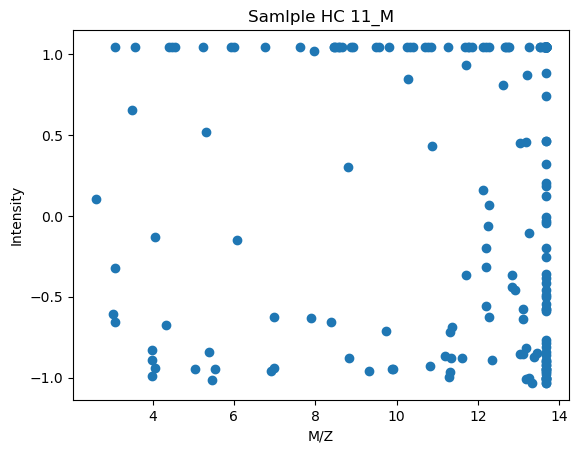

HC 11_M    1.042864
dtype: object

In [112]:
# provo con la mediana
tic_median = df_x_lipidoma.median(axis=1)
# print(tic_median)
df_x_lipidoma_mad_median_temp = (df_x_lipidoma.sub(tic_median,axis=0)).abs()
# print(df_x_lipidoma_tic_median_temp)
df_x_lipidoma_mad_median_temp_median = df_x_lipidoma_mad_median_temp.median(axis=1)
# print(df_x_lipidoma_tic_median_temp_mad)
df_x_lipidoma_MAD = (df_x_lipidoma.sub(df_x_lipidoma_mad_median_temp,axis=0)).div(df_x_lipidoma_mad_median_temp_median,axis=0)
df_x_lipidoma_MAD

plt.scatter(df_x_lipidoma_MAD.iloc[0:1], df_x_lipidoma_MAD.iloc[90:91])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_lipidoma_MAD[90:91].max(axis=1)

#### Scaled data

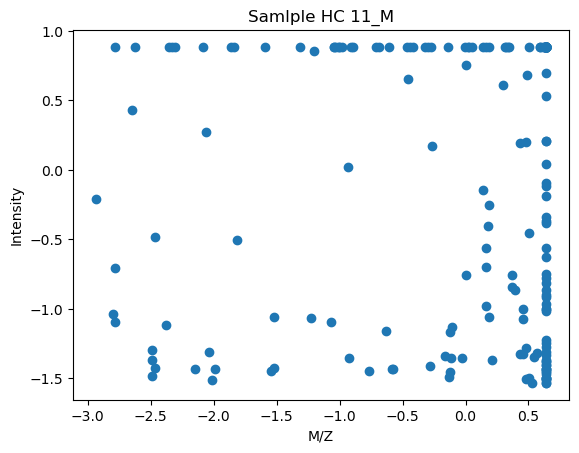

HC 11_M    0.884693
dtype: object

In [113]:
# # ogni campione - media
mean_x_mad = df_x_lipidoma_MAD.mean(axis=1)
std_x_mad = df_x_lipidoma_MAD.std(axis=1)

df_x_lipidoma_MAD_scaled = (df_x_lipidoma_MAD.sub(mean_x_mad,axis=0)).div(std_x_mad,axis=0)

plt.scatter(df_x_lipidoma_MAD_scaled.iloc[0:1], df_x_lipidoma_MAD_scaled.iloc[90:91])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()

df_x_lipidoma_MAD_scaled[90:91].max(axis=1)

#### Elbow Graph

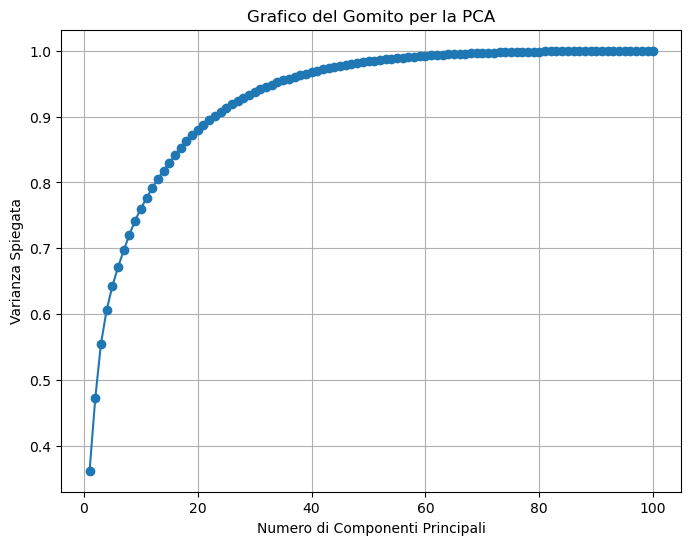

In [114]:
varianza_spiegata_mad_lipodoma = []
n_componenti_mad_lipodoma = np.arange(1, 101)

for n in n_componenti_mad_lipodoma:
    pca = PCA(n_components=n)
    pca.fit(df_x_lipidoma_MAD_scaled.iloc[1:])
    varianza_spiegata_mad_lipodoma.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.plot(n_componenti_mad_lipodoma, varianza_spiegata_mad_lipodoma, marker='o')
plt.xlabel('Numero di Componenti Principali')
plt.ylabel('Varianza Spiegata')
plt.title('Grafico del Gomito per la PCA')
plt.grid(True)
plt.show()

#### PCA

In [115]:
from sklearn.decomposition import PCA

pca_mad = PCA(n_components=40)
df_x_lipidoma_MAD_scaled_pca = pca_mad.fit(df_x_lipidoma_MAD_scaled.iloc[1:]).transform(df_x_lipidoma_MAD_scaled.iloc[1:])

# plt.scatter(df_x_lipidoma_MAD_scaled_pca[:, 0], df_x_lipidoma_MAD_scaled_pca[:, 1], c=colors)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(handles=[
#     plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
#     plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
#     plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10)
# ], title='Legend')
# plt.title('PCA')
# plt.show()

# print(pca_mad.explained_variance_ratio_)
# print(pca_mad.score(df_x_lipidoma_MAD_scaled))

df_x_lipidoma_MAD_scaled_pca[89:90].max(axis=1)

array([3.1952893])

#### Model

In [116]:
x = pd.DataFrame(df_x_lipidoma_MAD_scaled_pca)
y = df_y_lipidoma

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
x.columns = [f'PC{i+1}' for i in range(x.shape[1])]
x = x.transpose()
x.columns = name_samples_lipidoma
x = x.transpose()
x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
LC 203_M,0.139114,-0.174914,1.034891,0.481093,0.744269,-1.464006,0.941509,-1.402923,-0.493420,-0.241877,...,-0.174810,0.004788,0.079407,0.063781,0.231325,0.198831,0.209033,-0.214859,0.042533,0.109956
LC 235a_M,-1.157596,-1.178888,-1.821969,-0.560755,0.421936,0.864664,0.206980,0.390604,-0.429135,-0.087367,...,-0.283163,-0.104936,-0.037301,-0.275621,0.293888,0.082354,0.076131,-0.024033,0.128679,-0.202999
LC 235b_M,-0.718025,-1.803730,-0.668074,-0.582375,0.561562,0.299649,0.257081,0.359199,-0.419875,-0.772501,...,-0.180015,0.012384,-0.114487,0.114030,0.573520,0.004919,-0.042739,-0.102418,0.080858,-0.016536
LC 237_M,-1.137984,-0.140385,0.254170,1.554330,0.950082,0.926298,0.634467,0.399419,-0.275997,1.395648,...,0.001089,-0.245521,-0.182787,-0.065384,0.278810,-0.351849,-0.078995,-0.057624,0.195821,0.051210
LC 241a_M,-1.436235,-0.558977,-1.373994,-0.166480,-0.172484,0.500096,0.135288,0.593225,-0.270623,0.286698,...,0.123425,0.240788,0.124805,-0.116034,-0.451757,0.083654,0.234897,0.023153,0.077668,0.122157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC 19_M,-0.844185,2.911893,-0.987090,-0.797082,0.149325,0.049759,-0.860265,-0.085713,0.019664,-0.581077,...,-0.114926,-0.055705,0.119005,-0.282045,-0.017645,0.032156,-0.125637,-0.434833,0.377875,-0.094644
HC 21_M,-0.392654,0.359316,0.912154,-0.981649,0.896032,-0.195686,-2.027846,0.709871,-0.367254,0.283348,...,-0.409706,-0.463469,-0.217628,-0.051061,-0.358110,-0.124435,0.168046,-0.013785,0.147089,-0.139891
HC 22_M,-0.215126,2.581475,-1.036333,0.303405,2.416002,-0.068042,-0.010828,-0.055586,0.091567,-0.629914,...,0.311646,0.311939,-0.371418,-0.590861,-0.566596,-0.101608,0.603673,-0.234049,0.276210,0.055520
HC 20_M,-0.664393,1.447139,0.233743,-0.443771,0.211566,-0.093676,-0.556242,-0.028215,0.098964,-0.359823,...,-0.127982,0.196225,0.245684,0.556438,0.117547,-0.195035,0.078886,0.023250,-0.153489,-0.356385


In [117]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from imblearn.over_sampling import BorderlineSMOTE

x = df_x_lipidoma_MAD_scaled.iloc[1:]

k = 50
kf = KFold(k,shuffle=True,random_state=42)
# train_x, test_x, train_y, test_y

performance_scores = []
performance_scores_balanced = []
i = 0
# Itera attraverso i fold
for train_index, val_index in kf.split(x):
    i+=1
    train_x, test_x = x.iloc[train_index],x.iloc[val_index]
    train_y, test_y = y.iloc[train_index],y.iloc[val_index]
    
    # print("FOLD %d" %i)
    
    #ribilanciamento
    bls = BorderlineSMOTE(random_state=99)
    train_x,train_y = bls.fit_resample(train_x,train_y)
    # print(train_y.value_counts())

    # normalizzazione
    train_stats = pd.DataFrame()
    train_stats['mean'] = train_x.mean(0)
    train_stats['std'] = train_x.std(0)
    train_stats['std'][train_stats['std']==0] = 1

    #normalizzo i dati
    train_x = norm(train_x)
    test_x = norm(test_x)
    
    lm = LogisticRegression(penalty='l2', C=0.9, class_weight='balanced', multi_class='auto',max_iter=1000, n_jobs=4) # penalty{‘l1’, ‘l2’, ‘elasticnet’, None}; multi_class{‘auto’, ‘ovr’, ‘multinomial’}
    
    lm.fit(train_x, train_y)
    
    predicted_y = lm.predict(test_x)
    
    # Calcola e memorizza la misura delle prestazioni (es. accuratezza)
    accuracy = np.round(mt.accuracy_score(test_y,predicted_y)*100,2)
    performance_scores.append(accuracy)
    balanced_accuracy = np.round(mt.balanced_accuracy_score(test_y,predicted_y)*100,2)
    performance_scores_balanced.append(balanced_accuracy)
    
mean_accuracy = sum(performance_scores)/k
mean_accuracy_balanced = sum(performance_scores_balanced)/k

print("L'accuracy è: ", mean_accuracy, "\nLa balanced_accuracy è: ", mean_accuracy_balanced)

/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/bvs/opt/anaconda3/envs/AI4Omics/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2394: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


L'accuracy è:  95.3334 
La balanced_accuracy è:  95.3334


##### Print important features by loadings

In [118]:
loadings_mad = pca_mad.components_

important_features_mad = [i for i, loading in enumerate(loadings_mad[0]) if abs(loading) > 0.22]

print(df_x_lipidoma_MAD_scaled.columns[important_features_mad])

Index(['LPC O-18:0', 'LPC O-18:1_B', 'LPC O-24:1', 'PC 18:1_22:6',
       'TG 18:1_18:2_20:4'],
      dtype='object')


##### Q-residual

In [119]:
original_data_reconstructed_mad = pca_mad.inverse_transform(df_x_lipidoma_MAD_scaled_pca)

q_residual = np.sum((df_x_lipidoma_MAD_scaled.iloc[1:] - original_data_reconstructed_mad) ** 2, axis=1)

q_residual

LC 203_M      0.54309
LC 235a_M    0.792746
LC 235b_M    0.608666
LC 237_M       0.4275
LC 241a_M    0.791508
               ...   
HC 19_M      0.687339
HC 21_M      0.610269
HC 22_M      0.482202
HC 20_M      0.908928
HC 23_M      0.855792
Length: 102, dtype: object

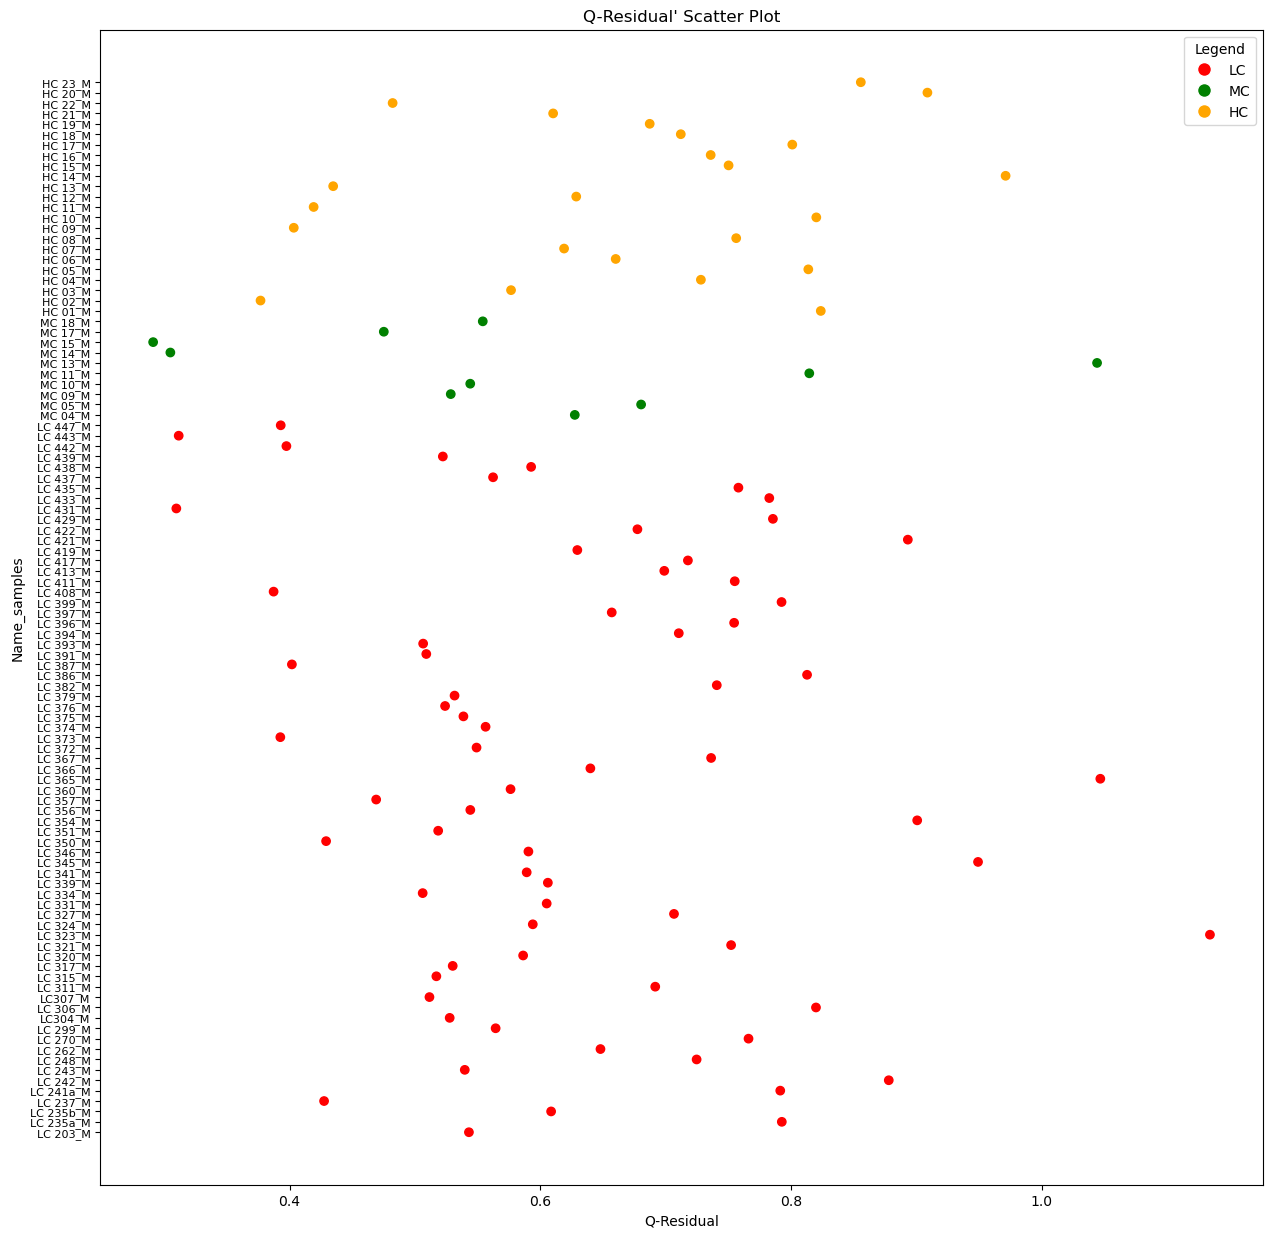

In [120]:
plt.figure(figsize=(15, 15))
plt.scatter(q_residual, name_samples_lipidoma, c=colors)
plt.xlabel('Q-Residual')
plt.ylabel('Name_samples')
plt.yticks(fontsize=8)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10)
], title='Legend')
plt.title("Q-Residual' Scatter Plot")
plt.show()

#### LDA

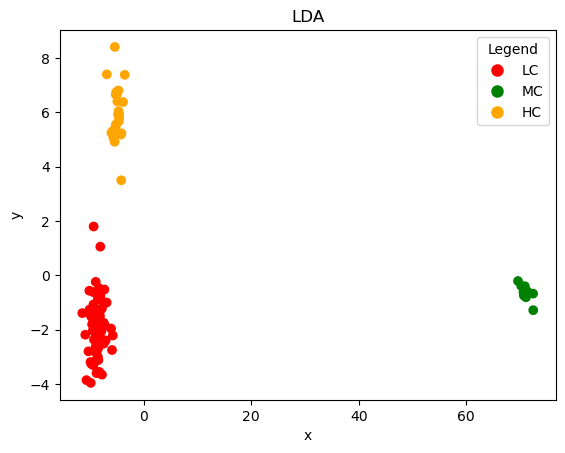

In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_mad = LDA(n_components=2)
df_x_lipidoma_MAD_scaled_lda = lda_mad.fit(df_x_lipidoma_MAD_scaled.iloc[1:],df_y_lipidoma).transform(df_x_lipidoma_MAD_scaled.iloc[1:])

plt.scatter(df_x_lipidoma_MAD_scaled_lda[:, 0], df_x_lipidoma_MAD_scaled_lda[:, 1], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='LC', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='MC', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='HC', markerfacecolor='orange', markersize=10)
], title='Legend')
plt.title('LDA')
plt.show()